<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<span style="font-size: 16px;">

+ Sesión: **Introducción a Series Temporales**
+ Módulo: **Series Temporales**
+ Curso: **Máster en Data Science 0423**
+ Alumno: **José Venegas Rodriguez**
+ Fecha: **12/07/2023**

</span>

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<center></span><b><b>ELECTROSTOCK<b></b></span></center>
    


## Informe final

A continuación muestro el informe  con los aspectos más relevantes relacionados con las evolución de los precios de Electrostock durante el pasado año y las predicciones de precios para el año siguiente. El informe estará compuesto por código, modelos de predicción y gráficos que serán comentados y desarrollados.

### 1. Introducción y Preprocesamiento: Análisis descriptivo

Para comenzar, vamos a cargar las diferentes librerías necesarias para procesar los datos y modelos imprescindibles en el estudio:

In [1]:
from datetime import datetime, timezone, time, timedelta, date
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

plt.style.use('seaborn-darkgrid')

A partir de aquí, ya podemos cargar el excel con el histórico de precios del último año:

In [2]:
df =  pd.read_csv("acciones_electrostock.csv")

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
1,2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2,2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
3,2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
4,2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300
5,2022-07-12,48.240002,48.759998,48.119999,48.349998,45.110252,1192200
6,2022-07-13,48.020000,49.200001,47.880001,48.980000,45.698036,1545100
7,2022-07-14,46.119999,46.660000,45.660000,46.299999,43.197617,2081300
8,2022-07-15,47.779999,48.180000,47.470001,47.930000,44.718395,1402400
9,2022-07-18,49.759998,50.080002,49.040001,49.169998,45.875309,2190400


#### Preprocesamiento

Vamos a preparar el dataframe para que pueda ser procesado correctamente por el sistema. Para ello, debemos eliminar valores nulo si los hubiera y ordenar las fechas si estuvieran desordenadas:

Con está función podemos observar que no hay ningún valor nulo:

In [3]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Dado que la columna de fechas viene en "object", que es algo así como letras, debemos de pasarlo a formato fecha para que el modelo la pueda procesar como tal:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'] )

Ahora ya viene en formato fecha:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


Transformamos la columna fecha ahora en una fila, la única de la tabla:

In [7]:
df = df.set_index('Date')


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300


In [9]:
df.index[0:5]

DatetimeIndex(['2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

Ordenamos los valores de fecha:

In [10]:
df = df.sort_values('Date')
df.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300
2022-07-12,48.240002,48.759998,48.119999,48.349998,45.110252,1192200
2022-07-13,48.020000,49.200001,47.880001,48.980000,45.698036,1545100
2022-07-14,46.119999,46.660000,45.660000,46.299999,43.197617,2081300
2022-07-15,47.779999,48.180000,47.470001,47.930000,44.718395,1402400


### Visualización de los datos:

Con este código podemos ver cual es la diferencia de precios diaria:

In [11]:
df['diferencia'] = df.Close.diff()
df['%_change_close']  = df.Close.pct_change()
df['%_change_close'] = df['%_change_close'].multiply(100)

In [12]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,diferencia,%_change_close
Date,,,,,,,,
2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700,NaN,NaN
2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900,-2.090001,-4.086023
2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700,1.219998,2.486747
2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400,-0.149998,-0.298325
2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300,-0.680000,-1.356473
2022-07-12,48.240002,48.759998,48.119999,48.349998,45.110252,1192200,-1.100003,-2.224475
2022-07-13,48.020000,49.200001,47.880001,48.980000,45.698036,1545100,0.630002,1.303003
2022-07-14,46.119999,46.660000,45.660000,46.299999,43.197617,2081300,-2.680001,-5.471623
2022-07-15,47.779999,48.180000,47.470001,47.930000,44.718395,1402400,1.630001,3.520521


En esta visualización podemos ver la gráfica de valores del último año:

In [13]:
px.line(df['Close'])

Como se puede observar, hay una tendencia en el tiempo y eso sugiere que los datos no son estacionarios. Sin embargo, para asegurar la estacionariedad de la serie, utilizaremos el test Dickey-Fuller más adelante.

En este historigrama vemos la cantidad de veces que ha tenido diferentes valores el precio a lo largo del año, desde el menos repetido (44-46) hasta el más repetido (62-64):

In [14]:
px.histogram(df['Close'])

También podemos observar una representación de la diferencia de precios diaria del último año. Se puede ver que después de las mayores bajadas hay una gran subida en el cierre diario:

In [15]:
diferencia= df['diferencia']
colores = ['green' if x >= 0 else 'red' for x in diferencia]
fig = go.Figure(data=[go.Bar(x=diferencia.index, y=diferencia.values, marker_color=colores)])
fig.update_layout(title='Diferencia diaria de precios',
                  xaxis_title='Fecha',
                  yaxis_title='Valores')

fig.show()




#### Estacionalidad 

Podemos comprobar la estacionalidad estadísticamente mediante el test de Dickey-Fuller. Éste indica si la serie de tiempo tiene una raíz unitaria y, por lo tanto, no es estacionaria (es decir, la media y la varianza cambian con el tiempo)

La hipótesis nula del test es que la serie temporal se puede representar mediante una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (que rechaza la hipótesis nula) es que la serie temporal es estacionaria.

**Hipótesis nula (H0)**: Si no se rechaza, indica que hay evidencia que sugiere que la serie de tiempo tiene una raíz unitaria y, por lo tanto, no es estacionaria. Tiene una estructura dependiente del tiempo.

**Hipótesis alternativa (H1)**: Si se rechaza la hipótesis nula, sugiere que la serie de tiempo no tiene raíz unitaria, lo que significa que es estacionaria. No tiene una estructura dependiente del tiempo.

Interpretamos el resultado de la prueba de Dickey-Fulle utilizando el valor del p-value. Como en cualquier otra prueba inferencial, el p-value indica la probabilidad de que la hipótesis nula sea cierta. En otras palabras, indica la probabilidad de que los resultados se obtengan por casualidad. Si el p-value está por debajo de cierto umbral o probabilidad (llamado intervalo de confianza), es decir, 0.05, significa que hay evidencia suficiente para sustentar que los resultados no son del todo aleatorios y por lo tanto se puede rechazar la hipótesis nula.

- **p-value > 0.05**: No se rechaza la hipótesis nula (H0), los datos tienen raíz unitaria y no son estacionarios.
- **p-value <= 0.05**: Rechaza la hipótesis nula (H0), el dato no tiene raíz unitaria y es estacionario.

Vamos a corroborar si los datos son estacionarios:

In [16]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(df['Close']) 
dict(zip(['adf', 'pvalue', 'n_lags', 'n_observations', 'critical' 'values', 'icbest'], fuller))

{'adf': -1.7411871998977115,
 'pvalue': 0.41002618975117566,
 'n_lags': 0,
 'n_observations': 250,
 'criticalvalues': {'1%': -3.456780859712,
  '5%': -2.8731715065600003,
  '10%': -2.572968544},
 'icbest': 670.3743277729174}

In [17]:
print('p-value of the Dickey-Fuller test: %f' % fuller[1])

p-value of the Dickey-Fuller test: 0.410026


Como hemos podido ver, p value es >0.05, lo cual rechaza la hipotesis nula, el dato no tiene raiz unitaria y no es estacionario. Nos interesa que nuestra serie sea estacionaria, es decir, que no tenga tendencia.

Para corregir la no estacionariedad, necesitamos diferenciar el valor de nuestra serie de tiempo: restar la observación anterior de la observación actual.

- diferencia(T) = observación(T) — observación(T-1)

In [18]:
df["diff_close"]=df["Close"]-df["Close"].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,diferencia,%_change_close,diff_close
Date,,,,,,,,,
2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700,NaN,NaN,NaN
2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900,-2.090001,-4.086023,-2.090001
2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700,1.219998,2.486747,1.219998
2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400,-0.149998,-0.298325,-0.149998
2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300,-0.680000,-1.356473,-0.680000


In [19]:
df1 = df.loc[:, ['diff_close']]
df1

,diff_close
Date,
2022-07-05,NaN
2022-07-06,-2.090001
2022-07-07,1.219998
2022-07-08,-0.149998
2022-07-11,-0.680000
...,...
2023-06-27,-0.760002
2023-06-28,-0.110001
2023-06-29,0.440002


Volvemos a calcular la hipotesis con el test de fuller:

In [20]:
fuller2 = adfuller(df1['diff_close'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], fuller2))

{'adf': -17.308471838622047,
 'pvalue': 5.573143270713838e-30,
 'usedlag': 0,
 'nobs': 249,
 'criticalvalues': {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 'icbest': 667.4783984533785}

El p value es inferior a 0,05, por lo que podemos rechazar la hipótesis nula. Esto significa que la segunda diferencia es estacionaria.

Esta gráfica representa los mismos datos que vimos en la gráfica anterior de barras verdes y rojas. En este caso a hemos representado en una linea, pero viene a representar lo mismo: la diferencia de valores respecto al dia anterior. Con este nuevo valor hemos conseguido corregir la no estacionalidad y ahora tenemos una grafica estacionaria, sin tendencia, con cuyos valores trabajaremos mas adelante.

In [21]:
px.line(df1['diff_close'])

**Nota**: *Si observamos la morfología de la última gráfica, es la misma que la gráfica previa de rojos y verdes, es decir, que la variación diaria de precios. Esto explica qué es exactamente la estacionalidad aplicada a este caso, una variación de precios diaria una vez eliminada la estructura dependiente en el tiempo, o lo que sería lo mismo, la diferencia con el dia anterior representada sin tener en cuenta el tiempo.* 

### 2. Desarrollo de Métodos


#### a) Primer método: SARIMAX

#### Modelos AR  y MA

Los modelos ARMA tienen dos componentes: Autorreregresivo (AR) y de Media Móvil (MA)

#### Autoregressive Models (AR)

El componente autorregresivo se expresa como el valor de un serie (Yt) en términos de sus valores retardos (Yt-1, Yt-2, etc....). Estos valores pasados ​​son representaciones del valor desplazado a períodos anterioes (es decir, _retrasado p periodos_).

El orden del modelo viene expresado por p y representa el número de retardos aplicados - el modelo se denomina AR(p).

#### Moving Average Models (MA)

La media móvil (MA) es un proceso en el que el valor actual de una serie temporal, y, se define como una combinación lineal de errores pasados. 

Por lo general, el orden del modelo con q retrasos requeridos se representat como MA (q).

Si también incluimos un factor de diferenciación en el modelo ARMA entonces ARMA se convierte en ARIMA:

ARMA(p,q)  - ARIMA(p, d ,q)

Por lo tanto, inicialmente, en nuestro modelo, d=1, dado que hemos hecho una diferenciación.

In [22]:
!pip install pmdarima

In [23]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
import random

rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

### Test de Autocorrelación

El último paso antes del modelo ARIMA es crear los gráficos de autocorrelación y autocorrelación parcial para ayudarnos a estimar los parámetros p, q, P y Q.

Hay algunas reglas muy útiles para los modelos ARIMA y ARIMA estacional que estamos usando que nos ayudan a estimar los parámetros observando los gráficos de autocorrelación y autocorrelación parcial.


Los test de autocorrelación evalúan la dependencia entre los valores pasados de la serie. Los calculamos con nuestra serie estacionaria.

### a) Autocorrelación (ACF)

La autocorrelación mide la relación lineal entre una observación y las observaciones pasadas a diferentes retrasos.

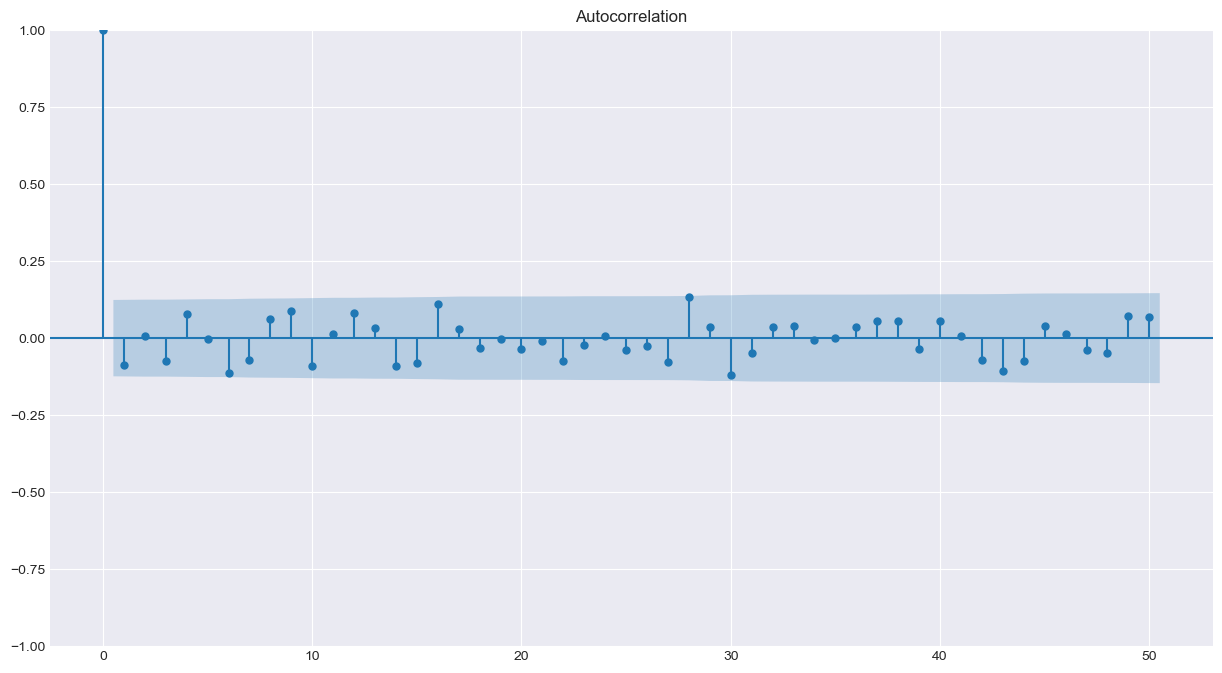

In [24]:
pax_acf = plot_acf(df1['diff_close'].dropna(), lags = 50)



### b) Autocorrelación parcial (PACF)

La autocorrelación parcial mide la correlación directa entre dos valores en la serie temporal después de eliminar el efecto de los valores intermedios.

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



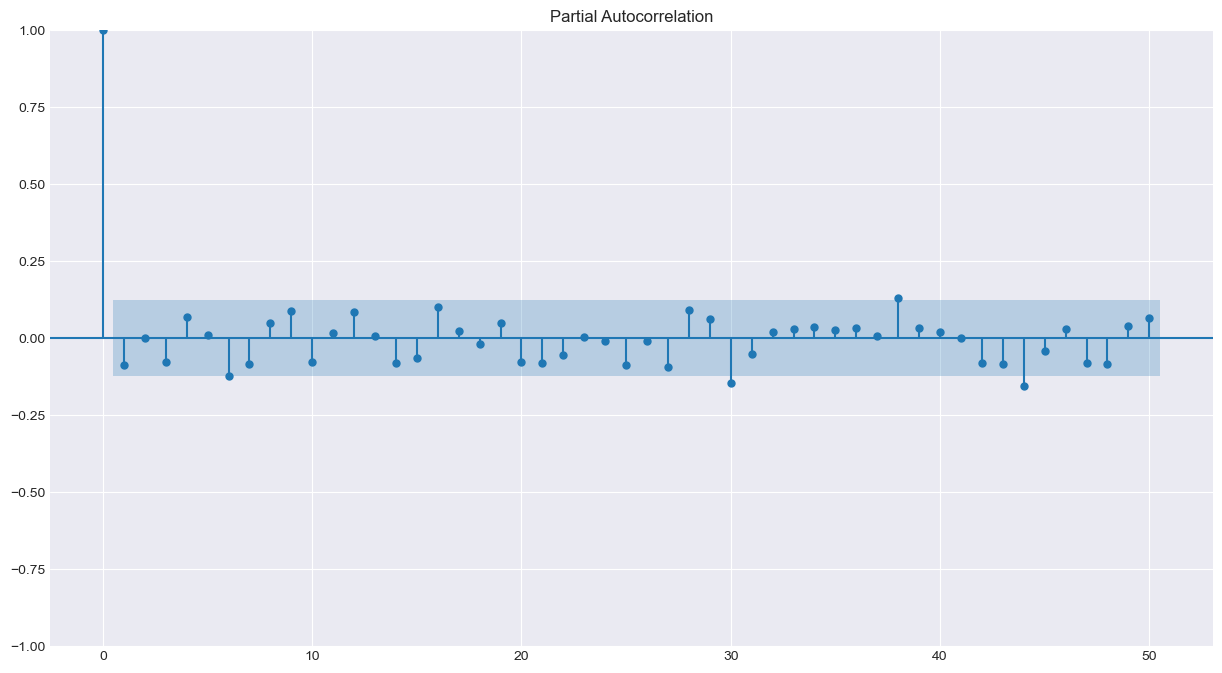

In [25]:
pax_pacf = plot_pacf(df1['diff_close'].dropna(), lags = 50)

Estos gráficos nos ayudarán a identificar inicialmente los componentes de autoregresioón de AR y MA en un modelo ARIMA. Estos pueden ir cambiando hasta ajustar el modelo:


Una vez que hemos observado los gráficos de correlación (ACF y PACF) de la serie temporal, podemos tomar una decisión sobre los valores de "p" y "q":

**Valor de "p" (orden de autorregresión)**: Observamos el gráfico de la función de autocorrelación parcial (PACF). Los picos significativos en la PACF indican las correlaciones directas con los rezagos pasados. Si hay muchos picos significativos en la PACF, consideraríamos un valor de "p" alto. En este caso, los picos se mantienen bajos, con lo que podriamos darle un valor inicial de 0 o 1. 

**Valor de "q" (orden de promedio móvil):** Analiza el gráfico de la función de autocorrelación (ACF). Los picos significativos en la ACF indican las correlaciones entre una observación y las observaciones pasadas. Si el gráfico muestra un corte brusco después de un rezago específico, sugiere que la correlación es significativa hasta ese punto y que el valor de "q" debería ser ese rezago. Pasa lo mismo que con "p". No hay picos significativos, y le damos un valor inicial de 0 o 1.

## Decomposición de Series Temporales 

La descomposición de series temporales en modelos aditivos y multiplicativos es una técnica que vamos a utilzar para analizar y comprender la estructura de la serie temporal. Esta técnica separa la serie en cuatro componentes principales: nivel, tendencia, estacionalidad y componente residual (o aleatorio). La diferencia entre los modelos aditivos y multiplicativos radica en cómo se combinan estos componentes:

### Modelo aditivo

Un modelo aditivo es lineal  $y(t) = Nivel + Tendencia + Estacionalidad + Ruido$

Es útil cuando las variaciones alrededor de la tendencia no varían con el nivel de la serie temporal. Los componentes se suman.


In [26]:
aditivo = seasonal_decompose(df1['diff_close'].dropna(), model = 'additive', period = 12)
aditivo

Representamos la gráfica:

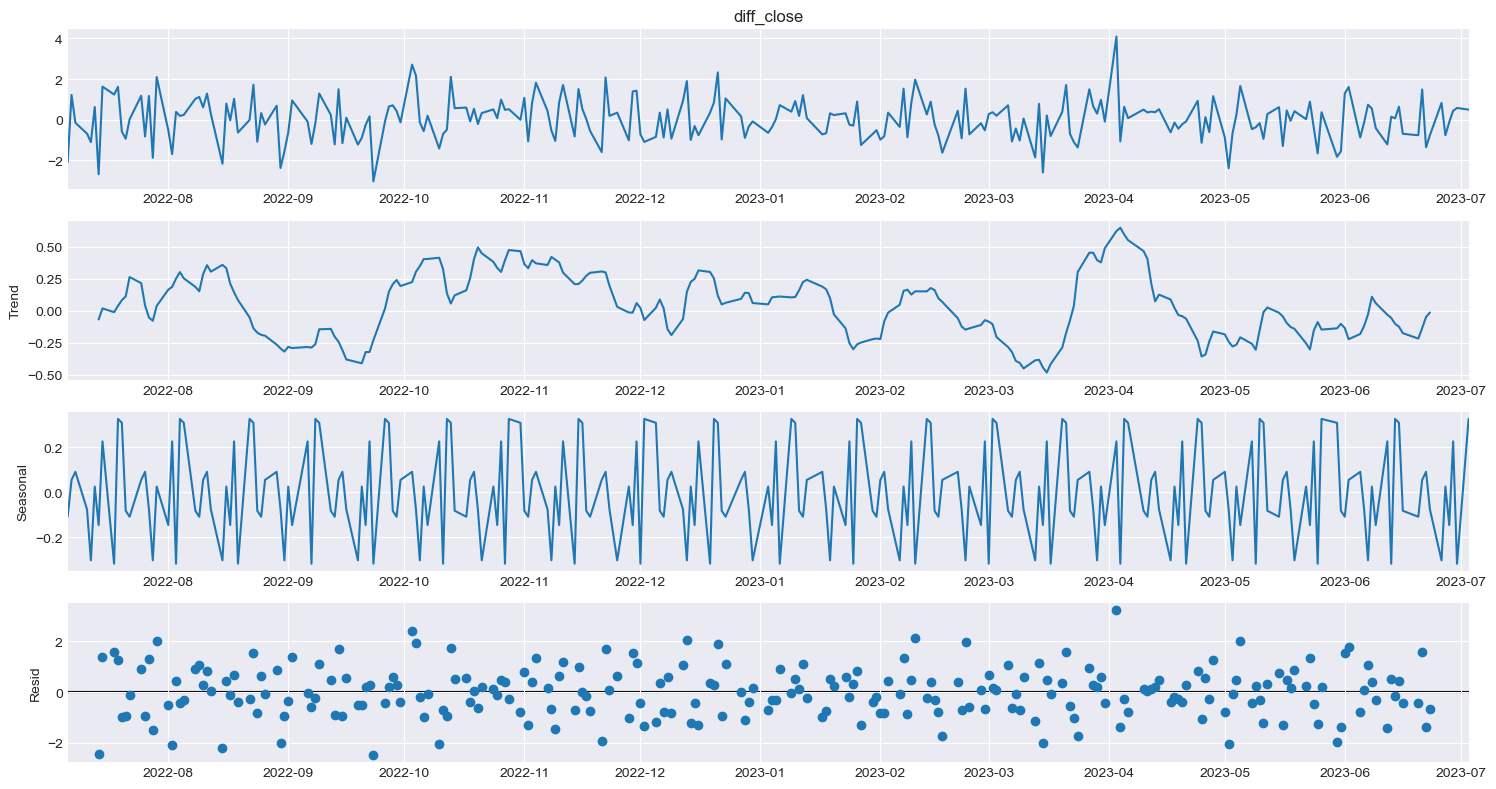

In [27]:
aditivo.plot()
plt.show()

Podemos ver que la tendencia desaparece (gráfica trend) al eliminar la no estacionalidad.

### Modelo Multipilcativo

El modelo multiplicativo no es lineal:  $y(t) = Nivel * Tendencia * Estacionalidad *  Ruido$

Una estacionalidad no lineal tiene una frecuencia y/o amplitud creciente o decreciente a lo largo del tiempo.
Es útil cuando la tendencia es proporcional al nivel de la serie temporal. Los componentes se multiplican entre sí.

In [28]:
multip = seasonal_decompose(df['Close'].dropna(), model='multiplicative',period=1)
multip


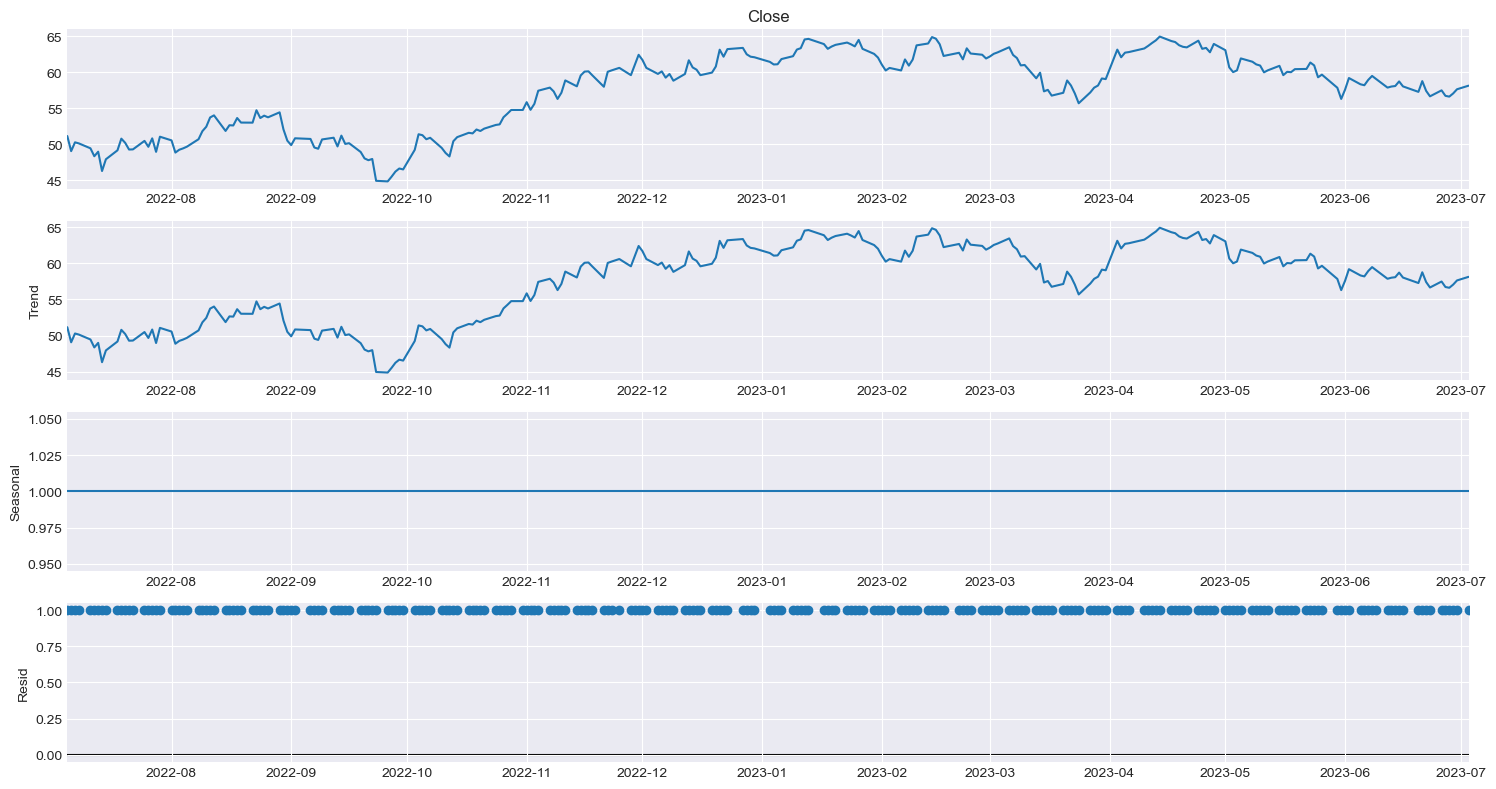

In [29]:
multip.plot()
plt.show()

El modelo multiplicativo es menos apropiado para este caso, ya que no permite valores 0 o negativos, y tratandose de la diferencia entre valores, tendremos un gran numero de valores negativos o 0. Por ello el modelo aditivo será el más apropiado para evaluar.

En el siguiente gráfico volvemos podemos ver la (no) tendencia sobre los valores diferenciados:

In [30]:
df1['trend'] = aditivo.trend
df1.head(15)

,diff_close,trend
Date,,
2022-07-05,NaN,NaN
2022-07-06,-2.090001,NaN
2022-07-07,1.219998,NaN
2022-07-08,-0.149998,NaN
2022-07-11,-0.680000,NaN
2022-07-12,-1.100003,NaN
2022-07-13,0.630002,NaN
2022-07-14,-2.680001,-0.067917
2022-07-15,1.630001,0.018333


Podemos ver la tendencia que hemos extraido del modelo aditivo y visualizarla sobre los datos (con estacionalidad):

In [31]:
px.line(df1, template = 'plotly_white')

#### Ajuste del modelo

Los valores que hemos elegido pueden no ser óptimos. Por ello, más adelante encontraremos los valores más óptimos con Auto (S)ARIMA(X), que evaluará muchas combinaciones.

In [32]:
model_pax = SARIMAX(df['Close'],order=(1,1,1), seasonal_order=(1, 0, 0, 12))
result_pax = model_pax.fit()
result_pax.summary()

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -360.389
Date:                             Sun, 23 Jul 2023   AIC                            728.777
Time:                                     17:57:21   BIC                            742.863
Sample:                                          0   HQIC                           734.446
                                             - 251                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6413      0.391     -1.641      0.101      -1.407       0.125
ma.L1          0.5568      0.427      1.303      0.193      -0.281       1.394
ar.S.L12       0.1002      0.073      1.377      0.169      -0.042       0.243
sigma2         1.0457      0.081     12.928      0.000       0.887       1.204
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               0.85   Skew:                             0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Analizamos el p-valor obtenido después de aplicar (S)ARIMA(X):

Si el p-valor asociado a un coeficiente es menor que un nivel de significancia previamente establecido (por ejemplo, 0.05), entonces se considera que el coeficiente es estadísticamente significativo. Rechazaríamos la hipótesis nula y podemos afirmar que el término correspondiente tiene un efecto significativo en el modelo.

En este caso, p es 0.1, nos es excesivamente elevada, pero buscaremos modificar más adelante para lograr una p menor.

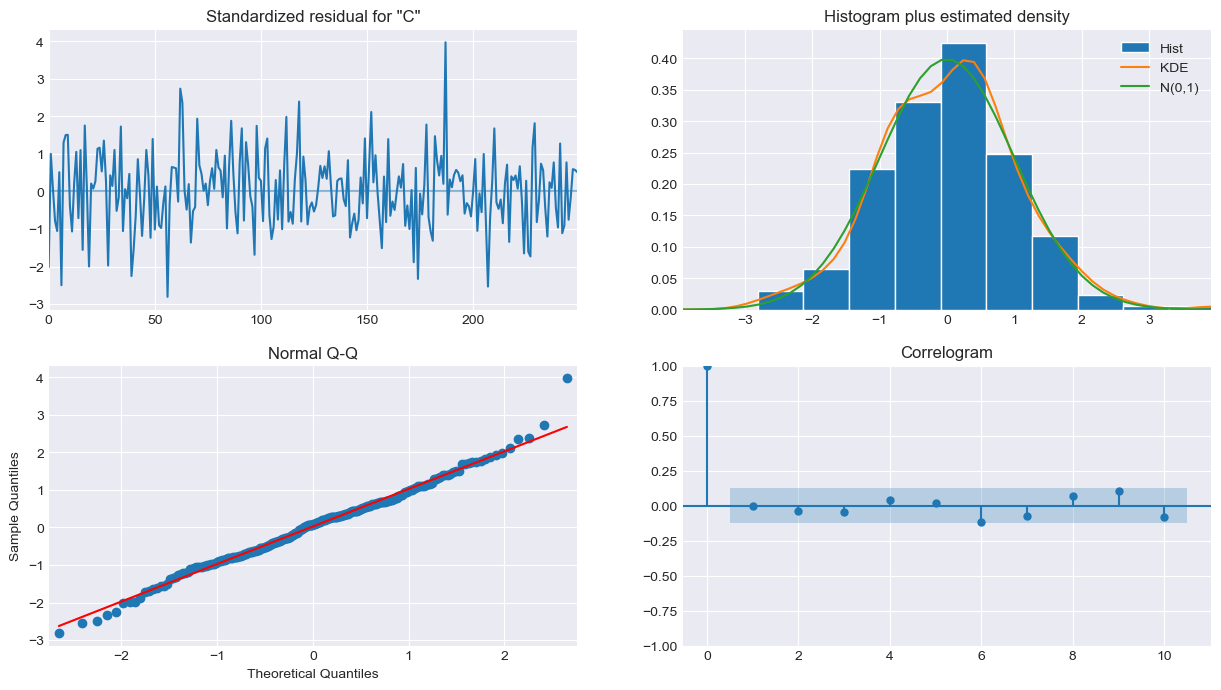

In [33]:
result_pax.plot_diagnostics()
plt.show()

¿Cómo interpretar el resultado de `plot_diagnostics()`?

+ **Arriba a la izquierda:** Los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.
+ **Arriba a la derecha:** En el diagrama de densidad debemos buscar una distribución normal con media cero. En nuestro caso la media está algo desviada del 0.
+ **Abajo a la izquierda:** Todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.
+ **Abajo a la derecha:** El correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. 

#### Predicción

Vamos a utlizar dos modos diferentes de hacer predicciones futuras a un año vista. La primera será mediante *forecast* y la segunda la haremos con *predict*:

Visualizamos las predicciones con forecast:

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<AxesSubplot:>

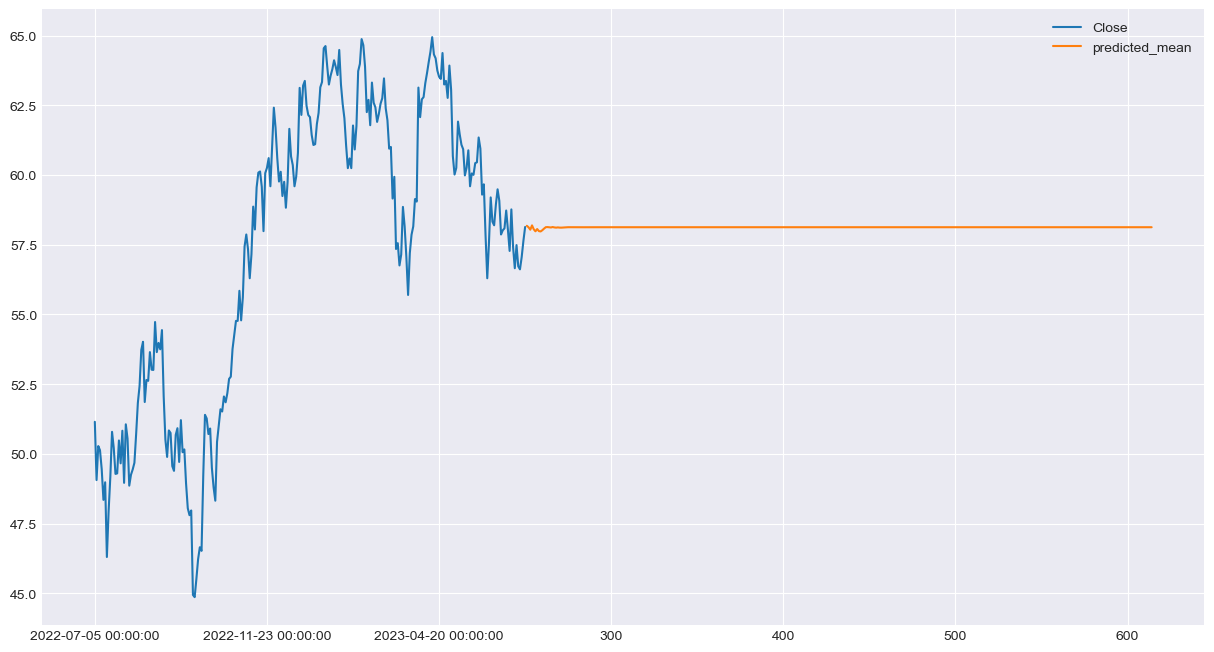

In [34]:
dfloc = df.loc[:, ['Close', 'diff_close']]
# Generamos nuevas fechas para las predicciones fuera de la muestra
new_dates = [dfloc.index[-1] + DateOffset(months=x) for x in range(1, 365)]

# Obtenemos las predicciones fuera de la muestra utilizando forecast()
forecast = result_pax.get_forecast(steps=len(new_dates))

# Obtenemos el intervalo de confianza para las predicciones fuera de la muestra
forecast_conf = forecast.conf_int()

# Combinamos las predicciones fuera de la muestra con el dataframe original
df_pred = pd.concat([dfloc, forecast.predicted_mean.to_frame(name='predicted_mean')])

# Obtenemos la grafica de los datos originales y las predicciones
df_pred.plot(y=['Close', 'predicted_mean'])


Visualizamos las predicciones con predict:

<AxesSubplot:>

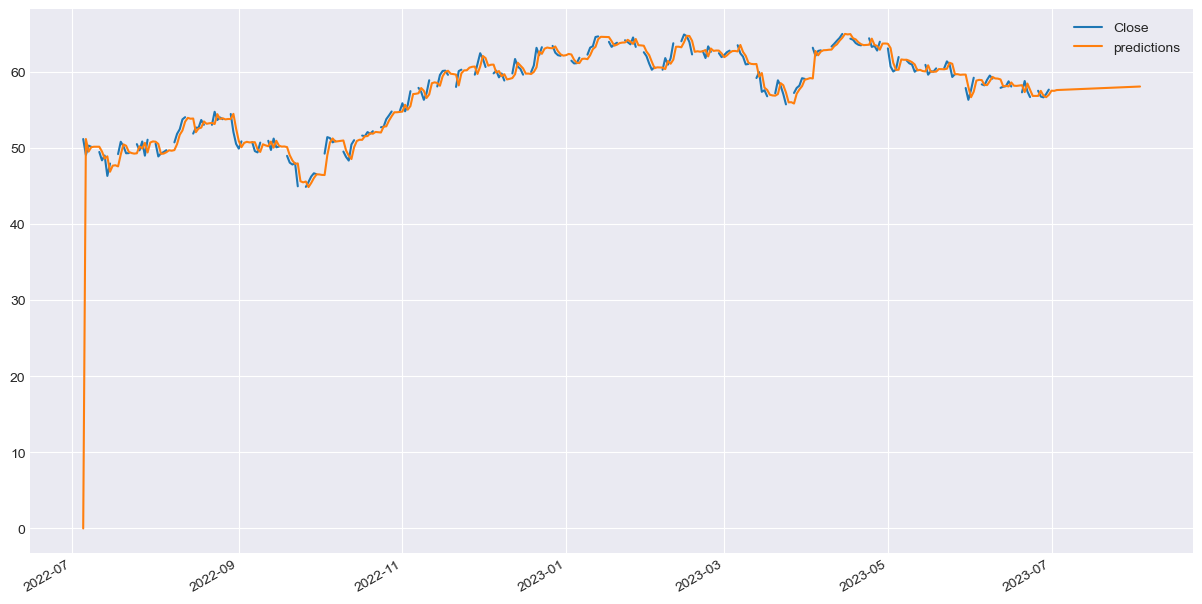

In [35]:
df3 = df.asfreq('D')
model_pax = SARIMAX(df3['Close'],order=(1,1,1), seasonal_order=(1, 0, 0, 12))
result_pax = model_pax.fit()
result_pax.summary()
# Generamos nuevas fechas para las predicciones fuera de la muestra
new_dates = [df3.index[-1] + DateOffset(months = x) for x in range(1,365)]
df_pred = pd.DataFrame(index = new_dates, columns = df3.columns)
# Combinamos las predicciones fuera de la muestra con el dataframe original
df_now_after = pd.concat([df3,df_pred])
# Obtenemos las predicciones fuera de la muestra utilizando predict()
df_now_after['predictions'] = result_pax.predict(start=0,end=400) 
df_now_after[['Close','predictions']].plot()

Las primeras predicciones nos muestran estabilidad en los resultados de electrostock en los meses posteriores, sin grandes descensos ni ascensos de valores.

Esto tendría sentido ya que en la gráfica de rojos y verdes de diferencia diaria de valores, no vimos grandes bajadas ni subidas en las últimas fechas, que eran las que a veces provocaban grandes ascensos y descensos de forma seguida.

#### Métricas de error (evaluación)

Para calcular las métricas de error debemos obtener los valores estimados, que son una suma de la estacionalidad y la tendencia extraida de la descomposición de series temporales:

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt

In [37]:
aditivo = seasonal_decompose(df1['diff_close'].dropna(), model = 'additive', period = 12)

In [38]:
dfmatrix=df1
dfmatrix['observed'] = aditivo.observed
dfmatrix['trend'] = aditivo.trend
dfmatrix['seasonal'] = aditivo.seasonal
dfmatrix['residual'] = aditivo.resid
dfmatrix['estimated'] = dfmatrix['seasonal'] + dfmatrix['trend']
df_matrix = df1[['diff_close', 'estimated']].copy()
df_matrix = df_matrix[df_matrix['estimated'].isna() == False]

Visualizamos la estimación:

In [39]:
px.line(df_matrix)

Evaluamos la calidad del modelo a partir de estas métricas:

#### Error Medio Absoluto (_Mean Absolute Error - MAE_)

El MAE es la diferencia promedio absoluta entre los valores observados y los valores pronosticados. Es menos sensible a los errores grandes y proporciona una medida más directa de la magnitud promedio de los errores. Un valor más bajo del MAE indica una mayor precisión del modelo.

In [40]:
mean_absolute_error(y_pred = df_matrix['estimated'], y_true = df_matrix['diff_close']) 

0.777645783409581

Un valor de MAE de 0.77 indica que, en promedio, los errores absolutos entre los valores observados y los valores pronosticados son de 0.77 unidades. En otras palabras, los valores pronosticados del modelo tienden a diferir en promedio por 0.77 unidades de los valores reales.

#### Error cuadrático medio (_Root Mean Squared Error - RMSE_)

El RMSE es una medida de la diferencia promedio entre los valores observados y los valores pronosticados al cuadrado. Es ampliamente utilizado y penaliza de manera más significativa los errores más grandes. Cuanto más bajo sea el valor del RMSE, mejor será la precisión del modelo.

In [41]:
sqrt(mean_squared_error(y_pred = df_matrix['estimated'], y_true = df_matrix['diff_close']))

0.982309796479756

Un valor de RMSE de 0.98 indica que, en promedio, los errores cuadráticos entre los valores observados y los valores pronosticados tienen una magnitud de aproximadamente 0.98 unidades.

### Auto ARIMA

Tal y como habíamos mencionado antes, Auto ARIMA nos puede ayudar a optimizar los parámetros p,q y d:

In [42]:
auto_arima_pax = auto_arima(df['Close'],
                       start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       D=0,
                       max_d = 3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
auto_arima_pax.summary()

Performing stepwise search to minimize aic


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=733.269, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=729.329, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=729.360, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=729.397, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=727.513, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=729.547, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=729.552, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=731.545, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=729.357, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=729.347, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=731.357, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.228 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -362.756
Date:                Sun, 23 Jul 2023   AIC                            727.513
Time:                        17:57:24   BIC                            731.034
Sample:                             0   HQIC                           728.930
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0663      0.083     12.853      0.000       0.904       1.229
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):                 4.58
Prob(Q):                              0.16   Prob(JB):                         0.10
Heteroskedasticity (H):               0.82   Skew:                             0.10
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Reajuste del modelo

Reajustamos el modelo con los parámetros obtenidos por el autorima: Best model:  ARIMA(0,1,0)(0,0,0)

In [43]:
model_auto = SARIMAX(df['Close'],order=(0, 1, 0),
              seasonal_order=(0, 0, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results_auto_arima = model_auto.fit()
results_auto_arima.summary()

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -359.747
Date:                Sun, 23 Jul 2023   AIC                            721.495
Time:                        17:57:24   BIC                            725.012
Sample:                             0   HQIC                           722.910
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0530      0.082     12.920      0.000       0.893       1.213
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                 5.13
Prob(Q):                              0.20   Prob(JB):                         0.08
Heteroskedasticity (H):               0.84   Skew:                             0.11
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vemos que el coeficiente de "P>|z|" es 0, lo cual lo hace más fiable y útil para interpretar el comportamiento de la serie temporal.

La predicción con los parámetros optimizados también muestra una estabilidad en los resultados:

c:\Users\veneg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<AxesSubplot:>

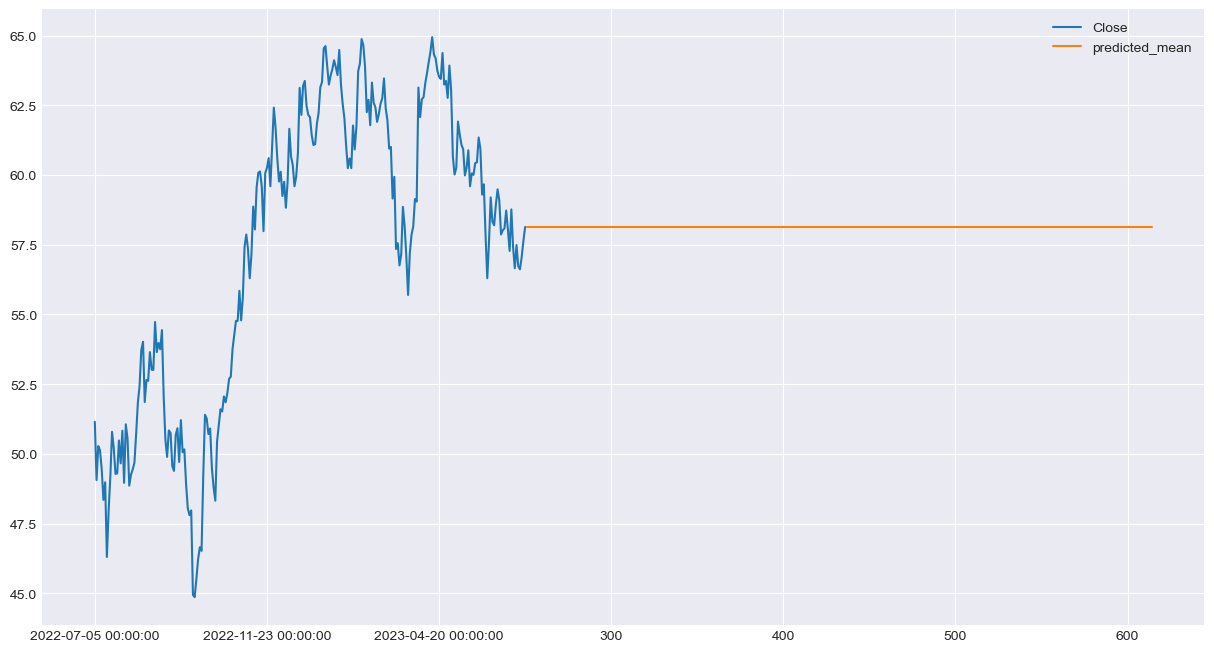

In [44]:
dfloc = df.loc[:, ['Close']]
new_dates = [dfloc.index[-1] + DateOffset(months=x) for x in range(1, 365)]
forecast = results_auto_arima.get_forecast(steps=len(new_dates))
forecast_conf = forecast.conf_int()
df_pred = pd.concat([dfloc, forecast.predicted_mean.to_frame(name='predicted_mean')])
df_pred.plot(y=['Close', 'predicted_mean'])

<AxesSubplot:>

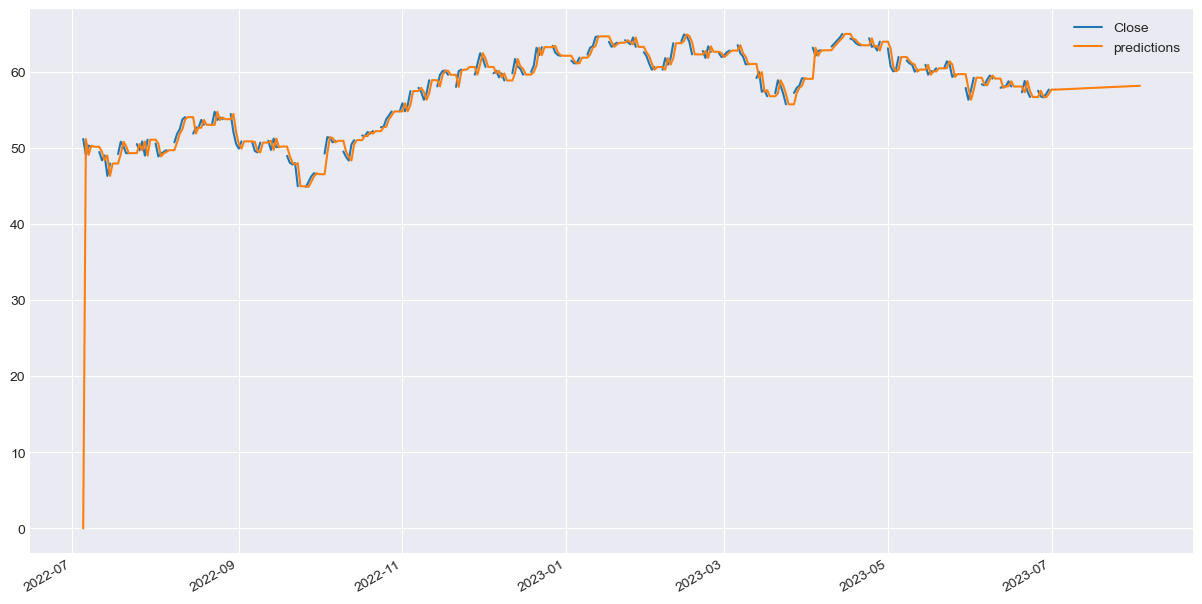

In [45]:
df3 = df.asfreq('D')
model_pax = SARIMAX(df3['Close'],order=(0,1,0), seasonal_order=(0, 0, 0, 12))
result_pax = model_pax.fit()
result_pax.summary()
new_dates = [df3.index[-1] + DateOffset(months = x) for x in range(1,365)]
df_pred = pd.DataFrame(index = new_dates, columns = df3.columns)
df_now_after = pd.concat([df3,df_pred])
df_now_after['predictions'] = result_pax.predict(start=0,end=400) 
df_now_after[['Close','predictions']].plot()

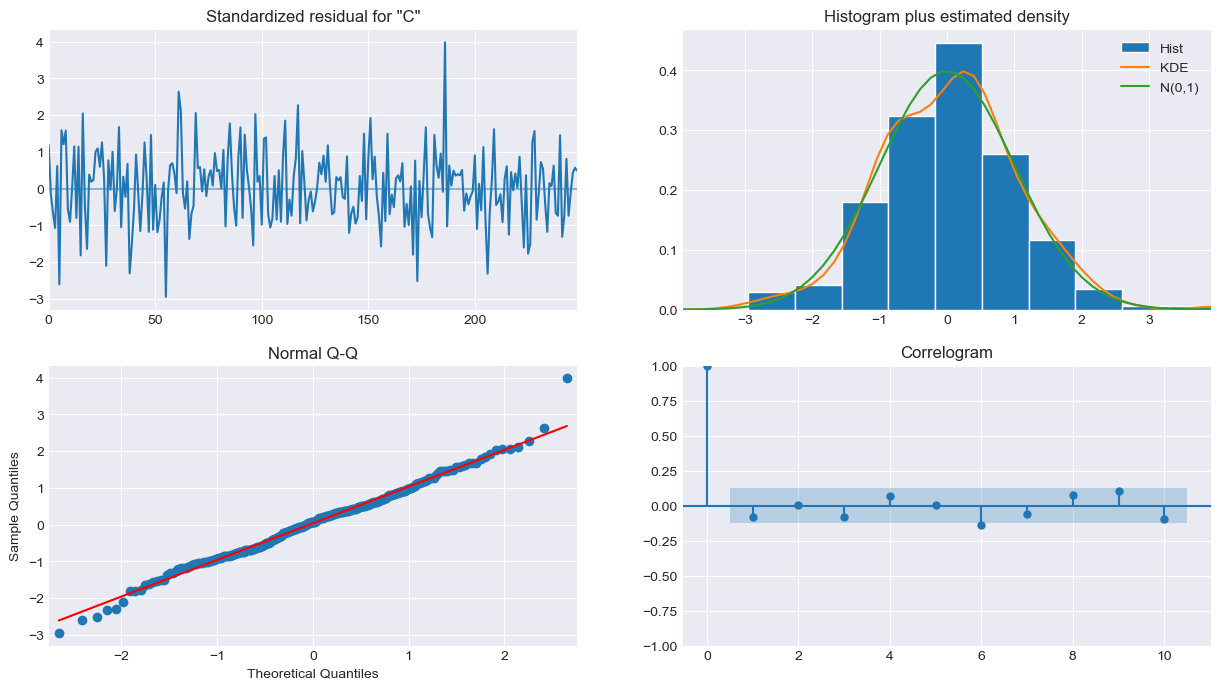

In [46]:
diag = results_auto_arima.plot_diagnostics()

Vemos además, que en este caso, la distribución es más normalizada que con los parámetros previos.

#### b) Segundo método método: Prophet

Los siguientes factores deben tenerse en cuenta al comerciar con Prophet

● Y(t): Variable objetivo a estimar - valor de la serie temporal

● G(t): componente de tendencia : una curva de crecimiento lineal o logística para 
detectar la tendencia de la serie. Prophet detecta automáticamente los puntos de 
cambio en los datos iniciales.

● S(t): Componente de estacionalidad : la estacionalidad anual se modela mediante 
series de Fourier, mientras que la estacionalidad semanal se modela mediante 
variables ficticias

● H(t): Lista de vacaciones proporcionada por el usuario

Y(t) = G(t) + S(t) + H(t) + E(t)


Importamos las bibliotecas necesarias para poder utilizar prophet

In [47]:
!pip install prophet

In [48]:
conda install -c conda-forge prophet

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\veneg\anaconda3

  added / updated specs:
    - prophet


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.05.30~ --> conda-forge::ca-certificates-2023.7.22-h56e8100_0 
  certifi            pkgs/main/win-64::certifi-2023.5.7-py~ --> conda-forge/noarch::certifi-2023.7.22-pyhd8ed1ab_0 
  conda              pkgs/main::conda-23.5.0-py310haa95532~ --> conda-forge::conda-23.5.2-py310h5588dad_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>set CMDSTAN= 

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>set CMDSTAN_OLD= 

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>SET CMDSTAN_OLD= 

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>SET CMDSTAN=c:/Users/veneg/anaconda3\



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2




In [49]:
conda install conda=23.5.0

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\veneg\anaconda3

  added / updated specs:
    - conda=23.5.0


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> pkgs/main::ca-certificates-2023.05.30-haa95532_0 
  certifi            conda-forge/noarch::certifi-2023.7.22~ --> pkgs/main/win-64::certifi-2023.5.7-py310haa95532_0 
  conda              conda-forge::conda-23.5.2-py310h5588d~ --> pkgs/main::conda-23.5.0-py310haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>set CMDSTAN= 

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12>set CMDSTAN_OLD= 

c:\Users\veneg\OneDrive\Documentos\VSCode\SEMANA 12

In [50]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from datetime import datetime, timezone, time, timedelta, date

Cargamos el histórico de precios del último año para prophet:

In [51]:
dfprophet =  pd.read_csv("acciones_electrostock.csv")

In [52]:
dfprophet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
1,2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2,2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
3,2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
4,2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300


In [53]:
dfprophet['Date'] = pd.to_datetime(dfprophet['Date'])
dfprophet = dfprophet.sort_values('Date')
dfprophet = dfprophet[['Date', 'Close']] 


Renombramos las columnas Close(y) y Date(ds):

In [54]:
dfprophet = dfprophet.rename(columns={'Close': 'y', 'Date': 'ds'})
dfprophet.tail()

,ds,y
246,2023-06-27,56.730000
247,2023-06-28,56.619999
248,2023-06-29,57.060001
249,2023-06-30,57.639999
250,2023-07-03,58.139999


#### Ajuste del modelo

Al ajustar el modelo, añadimos los festivos:

In [55]:
m = Prophet().add_country_holidays(country_name='Spain')
m.fit(dfprophet)

18:05:57 - cmdstanpy - INFO - Chain [1] start processing


18:05:57 - cmdstanpy - INFO - Chain [1] done processing


#### Proyecciones

Primero, necesitamos generar el conjunto de datos con las fechas que queremos predecir. Estas fechas se incluirán en una columna llamada `ds` y las predicciones se agregarán a esta columna. El marco de datos se crea utilizando el método `Prophet.make_future_dataframe()`. De manera predeterminada, también incluirá las fechas históricas con las que entrenamos el modelo, por lo que podremos ver la calidad del ajuste del modelo.

In [56]:
future_df = m.make_future_dataframe(periods=365) 
#configuramos el modelo para que tenga en cuenta los fines de semana
future_df = future_df[future_df['ds'].dt.weekday < 5]
future_df.tail(20)

,ds
588,2024-06-05
589,2024-06-06
590,2024-06-07
593,2024-06-10
594,2024-06-11
595,2024-06-12
596,2024-06-13
597,2024-06-14
600,2024-06-17
601,2024-06-18


In [57]:
forecast_df = m.predict(future_df)

display(forecast_df.head(5))
display(forecast_df.tail(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Asunción de la Virgen,Asunción de la Virgen_lower,Asunción de la Virgen_upper,Año nuevo,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-05,50.276299,47.816873,52.599655,50.276299,50.276299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.046650,-0.046650,-0.046650,0.0,0.0,0.0,50.229649
1,2022-07-06,50.281192,47.421686,52.641014,50.281192,50.281192,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.136683,-0.136683,-0.136683,0.0,0.0,0.0,50.144508
2,2022-07-07,50.286084,47.522783,52.539167,50.286084,50.286084,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.271379,-0.271379,-0.271379,0.0,0.0,0.0,50.014706
3,2022-07-08,50.290977,47.732032,52.690788,50.290977,50.290977,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.100188,-0.100188,-0.100188,0.0,0.0,0.0,50.190789
4,2022-07-11,50.305655,47.631312,52.462429,50.305655,50.305655,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.242103,-0.242103,-0.242103,0.0,0.0,0.0,50.063552


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Asunción de la Virgen,Asunción de la Virgen_lower,Asunción de la Virgen_upper,Año nuevo,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
502,2024-06-19,40.988909,16.025516,67.848929,16.067023,67.224724,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.136683,-0.136683,-0.136683,0.0,0.0,0.0,40.852225
503,2024-06-20,40.941121,15.220566,67.113936,15.775324,67.442910,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.271379,-0.271379,-0.271379,0.0,0.0,0.0,40.669743
504,2024-06-21,40.893334,15.181982,67.200784,15.600937,67.701640,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.100188,-0.100188,-0.100188,0.0,0.0,0.0,40.793146
505,2024-06-24,40.749971,14.972059,67.707917,15.335916,67.734281,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.242103,-0.242103,-0.242103,0.0,0.0,0.0,40.507868
506,2024-06-25,40.702184,14.711875,67.807047,15.176181,67.892329,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.046650,-0.046650,-0.046650,0.0,0.0,0.0,40.655534
507,2024-06-26,40.654396,14.751799,68.228551,14.957584,68.055480,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.136683,-0.136683,-0.136683,0.0,0.0,0.0,40.517713
508,2024-06-27,40.606609,14.206232,68.130803,14.711980,68.216347,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.271379,-0.271379,-0.271379,0.0,0.0,0.0,40.335230
509,2024-06-28,40.558821,14.095110,68.205386,14.469613,68.377213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.100188,-0.100188,-0.100188,0.0,0.0,0.0,40.458634
510,2024-07-01,40.415459,14.172529,68.012115,14.137494,68.442505,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.242103,-0.242103,-0.242103,0.0,0.0,0.0,40.173356
511,2024-07-02,40.367672,13.932925,68.891607,13.900710,68.603371,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.046650,-0.046650,-0.046650,0.0,0.0,0.0,40.321021


Obtendremos, además de la predicción general (yhat), una predicción más optimista(yhat_upper) y otra más pesimista(yhat_lower):

In [58]:
forecast_clean = forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_clean

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-05,50.229649,47.816873,52.599655
1,2022-07-06,50.144508,47.421686,52.641014
2,2022-07-07,50.014706,47.522783,52.539167
3,2022-07-08,50.190789,47.732032,52.690788
4,2022-07-11,50.063552,47.631312,52.462429
...,...,...,...,...
507,2024-06-26,40.517713,14.751799,68.228551
508,2024-06-27,40.335230,14.206232,68.130803
509,2024-06-28,40.458634,14.095110,68.205386
510,2024-07-01,40.173356,14.172529,68.012115


Visualizamos la gráfica a un año vista. Vemos que la tendencia general es bajista. En el caso más optimista, **Yhat Upper** muestra una tendencia que comienza bajando hasta noviembre de 2023 para luego reduperarse finalmente en junio de 2023.

In [59]:
plot_plotly(m, forecast_df)

 #### Descomposición de los resultados

Si deseamos ver los componentes del pronóstico, podemos utilizar el método `Prophet.plot_components()`. De manera predeterminada, se mostrarán la tendencia y las estacionalidades de la serie temporal. Si se incluyen días festivos, también aparecerán en el gráfico.

In [60]:
plot_components_plotly(m, forecast_df)

c:\Users\veneg\anaconda3\lib\site-packages\prophet\plot.py:870: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



#### Entrenamiento y Evaluación

Comparamos predicciones en la muestra y fuera de la muestra. Puede ser útil para evaluar y visualizar el rendimiento del modelo y las predicciones.

In [61]:
train_df = dfprophet.loc[dfprophet['ds'] <= '2023-07-03']
test_df = dfprophet.loc[dfprophet['ds'] >= '2023-07-03']

In [62]:
model_ml = Prophet(interval_width=0.9, weekly_seasonality=True, daily_seasonality=True).add_country_holidays(country_name='Spain')
model_ml.fit(train_df)

18:05:58 - cmdstanpy - INFO - Chain [1] start processing
18:05:58 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future_ml_df = model_ml.make_future_dataframe(periods =len(test_df)+365, freq = 'D')
future_ml_df= future_ml_df[future_ml_df['ds'].dt.weekday < 5]
future_ml_df


,ds
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-11
...,...
610,2024-06-27
611,2024-06-28
614,2024-07-01
615,2024-07-02


In [64]:
forecast_ml_df = model_ml.predict(future_ml_df)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_ml_df.tail(30)

,ds,yhat,yhat_lower,yhat_upper
483,2024-05-23,41.540826,11.285824,72.745663
484,2024-05-24,41.664896,12.617474,72.288610
485,2024-05-27,41.370766,10.682430,72.308609
486,2024-05-28,41.522360,12.196244,73.470410
487,2024-05-29,41.378769,12.047914,73.506537
488,2024-05-30,41.197311,10.859146,74.266703
489,2024-05-31,41.321380,9.512915,74.796881
490,2024-06-03,41.027250,10.206809,72.802997
491,2024-06-04,41.178844,9.773086,73.387929
492,2024-06-05,41.035254,10.553473,74.615549


In [65]:
px.line(pd.concat([dfprophet.set_index('ds')['y'], forecast_ml_df.set_index('ds')['yhat']], axis = 1), title = 'Proyecciones con Prophet - Estacionalidad aditiva')

#### Evaluación

#### Validación cruzada

La función cross_validation realiza una validación cruzada en el modelo Prophet entrenado (model_ml).

**initial**='100 days': Especifica el período inicial de entrenamiento que se utilizará para ajustar el modelo inicialmente. En este caso, se ajustará el modelo utilizando los primeros 100 días de datos.

**period='30 days'**: Especifica el período de tiempo que se utilizará para cada entrenamiento adicional después del modelo inicial. En este caso, se entrenará el modelo cada 30 días adicionales.

**horizon**='90 days': Especifica el horizonte de predicción para cada entrenamiento. En este caso, se realizarán predicciones para los próximos 90 días después de cada entrenamiento.

In [66]:
cv_add = cross_validation(model = model_ml, initial='100 days', period='30 days', horizon = '90 days')


  0%|          | 0/6 [00:00<?, ?it/s]

18:05:59 - cmdstanpy - INFO - Chain [1] start processing
18:05:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:00 - cmdstanpy - INFO - Chain [1] start processing
18:06:00 - cmdstanpy - INFO - Chain [1] done processing
18:06:00 - cmdstanpy - INFO - Chain [1] start processing
18:06:00 - cmdstanpy - INFO - Chain [1] done processing
18:06:00 - cmdstanpy - INFO - Chain [1] start processing
18:06:01 - cmdstanpy - INFO - Chain [1] done processing
18:06:01 - cmdstanpy - INFO - Chain [1] start processing
18:06:01 - cmdstanpy - INFO - Chain [1] done processing
18:06:01 - cmdstanpy - INFO - Chain [1] start processing
18:06:01 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
df_performance_add = performance_metrics(cv_add)
display(df_performance_add.head(10))

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,8.648650,2.940859,2.372129,0.038635,0.030971,0.038695,0.555556
1,10 days,10.375814,3.221151,2.573489,0.041943,0.032639,0.041971,0.533333
2,11 days,11.326609,3.365503,2.704290,0.044232,0.038581,0.044094,0.500000
3,12 days,11.948390,3.456644,2.769182,0.045445,0.033744,0.045241,0.506944
4,13 days,12.515306,3.537698,2.776893,0.045351,0.033744,0.045400,0.506944
5,14 days,13.994858,3.740970,2.979822,0.048565,0.038772,0.048636,0.479167
6,15 days,15.524636,3.940132,3.186495,0.052070,0.052479,0.051988,0.430556
7,16 days,15.580348,3.947195,3.193898,0.052244,0.047990,0.052137,0.430556
8,17 days,16.056597,4.007068,3.259005,0.053408,0.047990,0.053235,0.422222
9,18 days,15.681281,3.959960,3.221671,0.052991,0.049782,0.052606,0.433333


El RMSE (Root Mean Squared Error o Raíz del Error Cuadrático Medio) es útil para entender cómo el rendimiento del modelo varía en diferentes segmentos de tiempo durante la validación cruzada.

Para interpretar la gráfica:

El **eje x** representa el tiempo en el que se realizaron las predicciones durante la validación cruzada.

El **eje y** representa los valores del RMSE para cada predicción en los diferentes segmentos de tiempo.

Cada punto en la gráfica corresponde a una predicción hecha durante la validación cruzada.
Interpretación general:

Si la gráfica muestra puntos dispersos y no sigue un patrón claro, indica que el rendimiento del modelo no ha sido constante y puede variar en diferentes segmentos de tiempo. Esto podría indicar que el modelo no es estable o que está sobreajustando a ciertos segmentos de los datos.
Si la gráfica muestra una tendencia ascendente o descendente, indica que el rendimiento del modelo ha ido mejorando o empeorando a medida que avanza en el tiempo. Esto podría sugerir que el modelo está aprendiendo o ajustándose a las características cambiantes de la serie temporal a lo largo del tiempo.
Si la gráfica muestra una tendencia plana, indica que el rendimiento del modelo ha sido más o menos constante en diferentes segmentos de tiempo. Esto podría indicar que el modelo está bien generalizado y no está siendo afectado significativamente por variaciones en la serie temporal.

Además, es importante tener en cuenta que, en general, se busca que el RMSE sea lo más bajo posible, ya que esto indica que las predicciones del modelo son cercanas a los valores reales de la serie de tiempo.

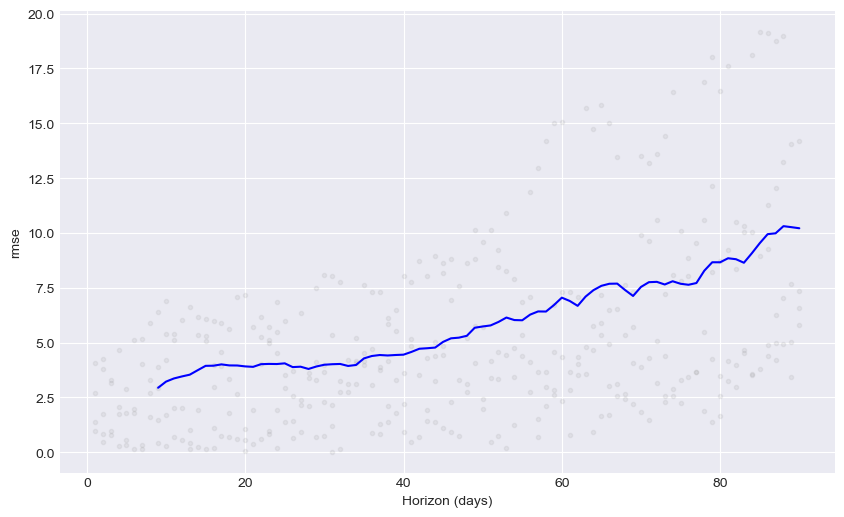

In [68]:
cv_plot = plot_cross_validation_metric(cv_add, metric = 'rmse')

Nuestra gráfica muestra una tendencia ascendente, lo cual debería indicar que el rendimiento del modelo ha ido mejorando a medida que avanza el tiempo. Sin embargo, no muestra una tendencia del todo plana, lo cual podría indicar que ha podido ser afectado por las variaciones en la serie temporal.

Con **df_performance_add** obtenemos las métricas rmse y mae para poder comparar y evaluar el modelo con los otros realizados en este proyecto:

In [69]:
df_performance_add.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,82,49 days 12:00:00,23 days 19:33:58.568845364,9 days 00:00:00,29 days 06:00:00,49 days 12:00:00,69 days 18:00:00,90 days 00:00:00
mse,82.0,39.557914,26.71742,8.64865,16.121213,32.56093,58.457532,106.266233
rmse,82.0,5.949998,2.051034,2.940859,4.015123,5.706146,7.645751,10.308551
mae,82.0,4.962562,1.733422,2.372129,3.313944,4.911615,6.230429,8.876708
mape,82.0,0.081239,0.028447,0.038635,0.05394,0.081005,0.101674,0.146234
mdape,82.0,0.070411,0.023135,0.030971,0.0532,0.07058,0.080428,0.132897
smape,82.0,0.0775,0.025097,0.038695,0.053496,0.078095,0.09548,0.134787
coverage,82.0,0.599622,0.149238,0.416667,0.472222,0.527778,0.756944,0.861111


 Si la media de las métricas de rendimiento es baja, eso sugiere que el modelo está haciendo predicciones precisas y cercanas a los valores reales en promedio. Esto es un indicador positivo del rendimiento del modelo.
 Como podemos ver en la gráfica rmse, la media aumenta a medida que avanza el horizonte temporal, lo cual querría decir que las predicciones serían cada vez más imprecisas.

#### c) Tercer método: Gradient Boosting Machine (GBM) 

El último método que utilizaremos es el gradient boosting machine. Para ello, instalaremos e importaremos las bibliotecas necesarias:

In [70]:
!pip install catboost
!pip install ipython
!pip install shap

In [71]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [72]:
dfboost = dfprophet
dfboost.tail()

,ds,y
246,2023-06-27,56.730000
247,2023-06-28,56.619999
248,2023-06-29,57.060001
249,2023-06-30,57.639999
250,2023-07-03,58.139999


#### CatBoost 

CatBoost es un algoritmo de "boosting" de gradientes que está diseñado para trabajar con datos tabulares.  Utiliza la técnica de "bootstrap aggregating" (bagging) y regularización para prevenir el sobreajuste en el entrenamiento del modelo. Esto lo hace más robusto frente a datos ruidosos y puede generalizar mejor a datos no vistos.

#### 1) Predicción in sample

Primero entrenaremos nuestro modelo con una predicción in sample, y evaluaremos el mismo para ver su eficacia. Posteriormente lo pondremos a prueba haciendo una predicción fuera de muestra.

#### Feature engineering
Creamos lags (retrasos) para mejorar la capacidad predictiva del modelo. Los lags se refieren a la inclusión de valores pasados de la variable objetivo o de otras variables independientes como características en el conjunto de datos.

In [73]:
dfboost['year'] = dfboost['ds'].dt.year
dfboost['month'] = dfboost['ds'].dt.month
dfboost.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    float64       
 2   year    251 non-null    int64         
 3   month   251 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 9.8 KB


In [74]:
dfboost['lag_1'] = dfboost['y'].shift(1)
dfboost['lag_2'] = dfboost['y'].shift(2)
dfboost['lag_3'] = dfboost['y'].shift(3)
dfboost['lag_12'] = dfboost['y'].shift(12)
dfboost['lag_24'] = dfboost['y'].shift(24)

dfboost

,ds,y,year,month,lag_1,lag_2,lag_3,lag_12,lag_24
0,2022-07-05,51.150002,2022,7,NaN,NaN,NaN,NaN,NaN
1,2022-07-06,49.060001,2022,7,51.150002,NaN,NaN,NaN,NaN
2,2022-07-07,50.279999,2022,7,49.060001,51.150002,NaN,NaN,NaN
3,2022-07-08,50.130001,2022,7,50.279999,49.060001,51.150002,NaN,NaN
4,2022-07-11,49.450001,2022,7,50.130001,50.279999,49.060001,NaN,NaN
...,...,...,...,...,...,...,...,...,...
246,2023-06-27,56.730000,2023,6,57.490002,56.660000,57.419998,59.490002,60.459999
247,2023-06-28,56.619999,2023,6,56.730000,57.490002,56.660000,59.080002,61.349998
248,2023-06-29,57.060001,2023,6,56.619999,56.730000,57.490002,57.869999,60.950001
249,2023-06-30,57.639999,2023,6,57.060001,56.619999,56.730000,58.020000,59.299999


#### División Train - Test

Dividimos nuestros datos en train y test, en los cuales train llegarán hasta el 1 de abril de 2023 y test desde entonces hasta el 3 de julio de 2023:

In [75]:
columns_X = ['year', 'month','lag_1','lag_2','lag_3','lag_12','lag_24']

columns_y = 'y'

start_date_train = pd.to_datetime('2022-07-05')
end_date_train = pd.to_datetime('2023-04-01')

start_date_test = pd.to_datetime('2023-04-01')
end_date_test = pd.to_datetime('2023-07-03')


In [76]:

dfboost.loc[(dfboost['ds'] >= start_date_train) & (dfboost['ds'] <= end_date_train), 'type'] = 'train'
dfboost.loc[(dfboost['ds'] >= start_date_test) & (dfboost['ds'] <= end_date_test), 'type'] = 'test'
dfboost.head()

,ds,y,year,month,lag_1,lag_2,lag_3,lag_12,lag_24,type
0,2022-07-05,51.150002,2022,7,NaN,NaN,NaN,NaN,NaN,train
1,2022-07-06,49.060001,2022,7,51.150002,NaN,NaN,NaN,NaN,train
2,2022-07-07,50.279999,2022,7,49.060001,51.150002,NaN,NaN,NaN,train
3,2022-07-08,50.130001,2022,7,50.279999,49.060001,51.150002,NaN,NaN,train
4,2022-07-11,49.450001,2022,7,50.130001,50.279999,49.060001,NaN,NaN,train


In [77]:
train_X = dfboost[dfboost['type'] == 'train'][columns_X]
train_y = dfboost[dfboost['type'] == 'train'][columns_y]
test_X = dfboost[dfboost['type'] == 'test'][columns_X]
test_y = dfboost[dfboost['type'] == 'test'][columns_y]



In [78]:
train_X

,year,month,lag_1,lag_2,lag_3,lag_12,lag_24
0,2022,7,NaN,NaN,NaN,NaN,NaN
1,2022,7,51.150002,NaN,NaN,NaN,NaN
2,2022,7,49.060001,51.150002,NaN,NaN,NaN
3,2022,7,50.279999,49.060001,51.150002,NaN,NaN
4,2022,7,50.130001,50.279999,49.060001,NaN,NaN
...,...,...,...,...,...,...,...
183,2023,3,55.700001,57.060001,58.160000,60.950001,62.700001
184,2023,3,57.200001,55.700001,57.060001,61.009998,61.790001
185,2023,3,57.860001,57.200001,55.700001,59.160000,63.320000
186,2023,3,58.160000,57.860001,57.200001,59.939999,62.599998


In [79]:
train_y

0      51.150002
1      49.060001
2      50.279999
3      50.130001
4      49.450001
         ...    
183    57.200001
184    57.860001
185    58.160000
186    59.139999
187    59.049999
Name: y, Length: 188, dtype: float64

#### Ajuste del modelo

Entrenamo el modelo:

In [80]:
model_cat = CatBoostRegressor(iterations=200,
                              learning_rate=0.1,
                              depth=5)

In [81]:

model_cat.fit(train_X, train_y, verbose = False)

preds = model_cat.predict(test_X)
preds

array([59.14136844, 61.19872566, 61.63828377, 62.12135484, 62.84197108,
       62.3388994 , 62.41123608, 62.84921068, 62.94466199, 63.3903324 ,
       62.71593107, 62.51285476, 62.65857417, 63.18103629, 62.92144354,
       63.28224199, 62.25798863, 62.51813635, 62.26959944, 62.82161816,
       62.61041689, 60.21536445, 59.56443093, 59.64284499, 61.07316188,
       61.06443372, 60.7613868 , 60.65318723, 60.08699144, 59.66116479,
       60.57153469, 59.73710098, 60.10136167, 59.71185293, 59.70142453,
       60.05651185, 60.57393029, 60.59482627, 59.45870939, 59.04572903,
       58.08343865, 57.38466284, 57.78453973, 58.85487546, 58.58444656,
       58.41049254, 58.9885125 , 58.64192887, 58.7693146 , 58.2920577 ,
       58.14649972, 58.5629805 , 59.10991979, 58.01720651, 58.57960524,
       59.08903553, 58.40129842, 58.15879443, 57.9529865 , 57.99750774,
       57.55793289, 57.73588129, 58.20851321])

Unimos train y test y realizamos la predicción in sample, que añadiremos a la tabla como 'close_pred':

In [82]:

dfboost['close_pred'] = np.concatenate([model_cat.predict(train_X), model_cat.predict(test_X)])
dfboost

,ds,y,year,month,lag_1,lag_2,lag_3,lag_12,lag_24,type,close_pred
0,2022-07-05,51.150002,2022,7,NaN,NaN,NaN,NaN,NaN,train,50.767727
1,2022-07-06,49.060001,2022,7,51.150002,NaN,NaN,NaN,NaN,train,49.441301
2,2022-07-07,50.279999,2022,7,49.060001,51.150002,NaN,NaN,NaN,train,50.140684
3,2022-07-08,50.130001,2022,7,50.279999,49.060001,51.150002,NaN,NaN,train,49.781807
4,2022-07-11,49.450001,2022,7,50.130001,50.279999,49.060001,NaN,NaN,train,49.395471
...,...,...,...,...,...,...,...,...,...,...,...
246,2023-06-27,56.730000,2023,6,57.490002,56.660000,57.419998,59.490002,60.459999,test,57.952986
247,2023-06-28,56.619999,2023,6,56.730000,57.490002,56.660000,59.080002,61.349998,test,57.997508
248,2023-06-29,57.060001,2023,6,56.619999,56.730000,57.490002,57.869999,60.950001,test,57.557933
249,2023-06-30,57.639999,2023,6,57.060001,56.619999,56.730000,58.020000,59.299999,test,57.735881


Representación de la predicción (rojo) frente a los datos originales (azul):

In [83]:
px.line(dfboost, x = 'ds', y =[ 'y', 'close_pred'], line_dash = 'type')


#### Evaluación

Vamos a evaluar el modelo con las mismas métricas que hemos utilizado para ARIMA y Prophet. Cabe recordar que un buen rendimiento del modelo implica unas medias cercanas a 0:

In [84]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_percentage_error


print('MAE in train')
display(mean_absolute_error(dfboost[dfboost['type'] == 'train']['y'], dfboost[dfboost['type'] == 'train']['close_pred']).round(4))

print('RMSE in train')
display(mean_squared_error(dfboost[dfboost['type'] == 'train']['y'], dfboost[dfboost['type'] == 'train']['close_pred'], squared = True).round(4))

print('MAPE in train')
display(mean_absolute_percentage_error(dfboost[dfboost['type'] == 'train']['y'], dfboost[dfboost['type'] == 'train']['close_pred']).round(4))


MAE in train


0.3787

RMSE in train


0.2212

MAPE in train


0.0068

In [85]:
print('MAE in test')
display(mean_absolute_error(dfboost[dfboost['type'] == 'test']['y'], dfboost[dfboost['type'] == 'test']['close_pred']).round(4))

print('RMSE in test')
display(mean_squared_error(dfboost[dfboost['type'] == 'test']['y'], dfboost[dfboost['type'] == 'test']['close_pred'], squared = True).round(4))

print('MAPE in train')
display(mean_absolute_percentage_error(dfboost[dfboost['type'] == 'test']['y'], dfboost[dfboost['type'] == 'test']['close_pred']).round(4))


MAE in test


0.8685

RMSE in test


1.2526

MAPE in train


0.0143

### Interpretación del Modelo

El método SHAP es una técnica para explicar las predicciones de un modelo, proporcionando una comprensión más clara de cómo las características o variables de entrada contribuyen a las predicciones resultantes. SHAP se basa en la teoría de juegos y utiliza el concepto de los valores de Shapley para asignar la contribución de cada característica a la predicción.

De esta forma, podemos comprender las contribuciones relativas de cada variable a las predicciones del modelo.

Text(0.5, 1.0, 'Feature Importance')

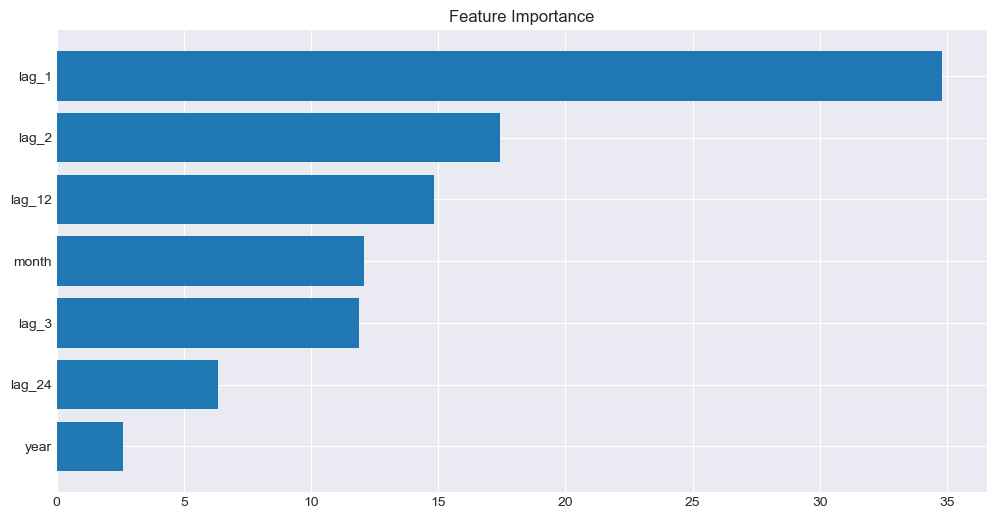

In [86]:
feature_importance = model_cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_X.columns)[sorted_idx])
plt.title('Feature Importance')

Otra forma de mostrar la importancia de las variables es utilizando la función summary_plot(). Este gráfico es más completo para comprender la asociación de las variables con la variable objetivo.

+ Impacto: La ubicación horizontal muestra si el efecto de ese valor está asociado con una predicción más alta o más baja.
+ Valor original: El color muestra si esa variable es alta (en rojo) o baja (en azul) para esa observación.
+ Correlación: Un alto nivel de contenido de "mes" tiene un impacto alto y negativo en el número de pasajeros. El "alto" se muestra mediante el color rojo, y el impacto "negativo" se muestra en el eje X (izquierda).

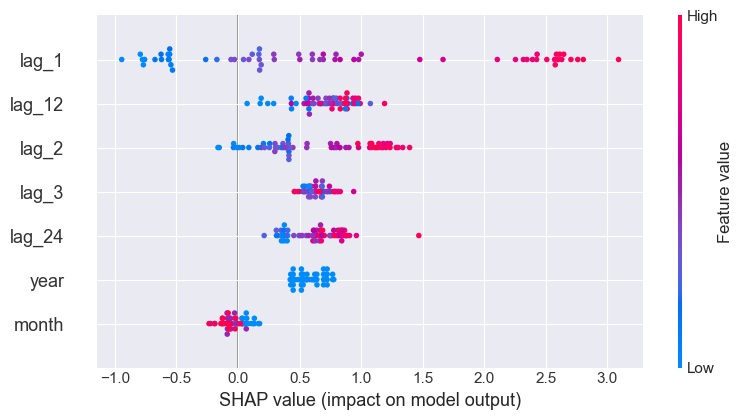

In [87]:
import shap
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(test_X)
shap.summary_plot(shap_values, test_X)

Como podemos ver, lag1, el retraso más próximo, es la variable que más ha afectado al modelo.

#### 2) Predicción out sample

A continuación, ya con el modelo entrenado, vamos a realizar las predicciones ou sample. Para ello, creamos una función que itere *t* veces, siendo t el número de dias más alla del 3 de julio de 2023, para que añada cada predicción diaria a los resultados contando con las predicciones de todos los días anteriores para realizarla:

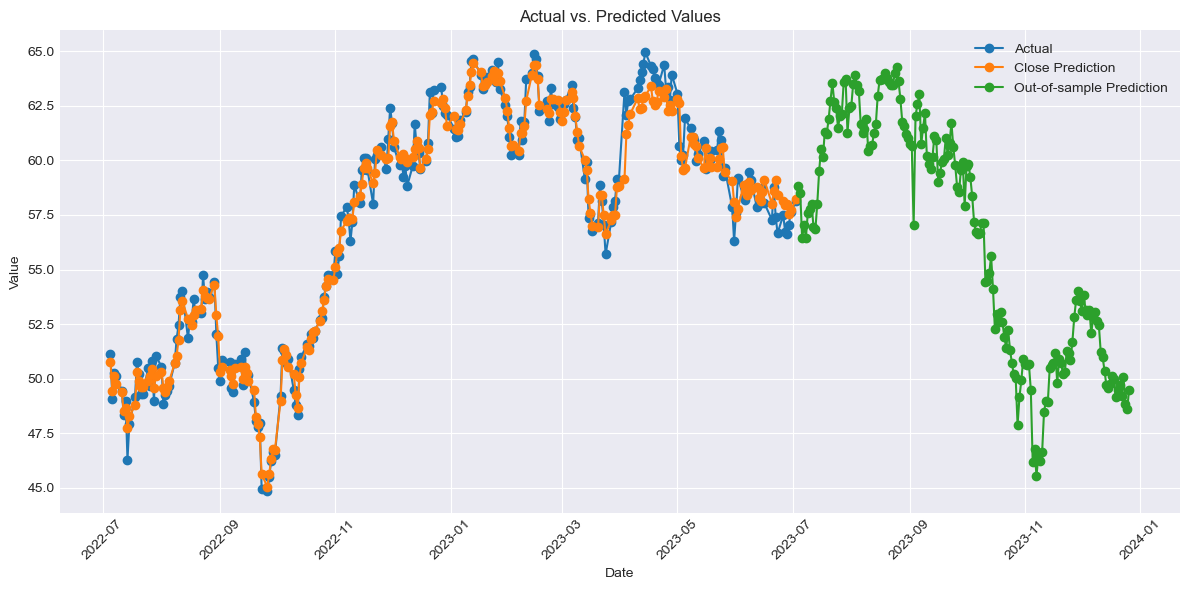

In [93]:
#Primero crearemos una función que replique la predicción que se hace con los datos de test para para t períodos fuera de la muestra.

def predict_out_of_sample(model, train_X, train_y,t):

    preds_out_of_sample = []

    for i in range(1, t+1):
        
        model.fit(train_X.iloc[:-i], train_y.iloc[:-i], verbose=False)
     
        pred = model.predict(train_X.iloc[-i].values.reshape(1, -1))[0]
        preds_out_of_sample.append(pred)

    return pd.Series(preds_out_of_sample)


# Utilizamos la función, suponiendo que t=X para predecir X períodos fuera de la muestra 
t = 176
out_of_sample_preds = predict_out_of_sample(model_cat, train_X, train_y,t)

# Creamos un DataFrame con las fechas de los próximos 12 meses 
start_date_next_year = pd.to_datetime('2023-07-03') + pd.DateOffset(days=1)
end_date_next_year = pd.to_datetime('2024-07-03')
date_range_next_year = pd.date_range(start=start_date_next_year, end=end_date_next_year, freq='D')
df_next_year = pd.DataFrame({'ds': date_range_next_year})

# Calculamos las características para las predicciones fuera de muestra
df_next_year['year'] = df_next_year['ds'].dt.year
df_next_year['month'] = df_next_year['ds'].dt.month
df_next_year['lag_1'] = dfboost['y'].iloc[-1]
df_next_year['lag_2'] = dfboost['y'].iloc[-2]
df_next_year['lag_3'] = dfboost['y'].iloc[-3]
df_next_year['lag_12'] = dfboost['y'].iloc[-12]
df_next_year['lag_24'] = dfboost['y'].iloc[-24]

# Predicciones fuera de muestra
pred_X = df_next_year[columns_X]
preds_out_of_sample = out_of_sample_preds

# Agregamos las predicciones fuera de la muestra al DataFrame df_next_year
df_next_year['out_of_sample_pred'] = preds_out_of_sample

# Combinar dfboost con df_next_year para tener todas las predicciones en un solo DataFrame
df_combined = pd.concat([dfboost, df_next_year], ignore_index=True)

# Visualizamos las predicciones:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['ds'], df_combined['y'], label='Actual', marker='o')
plt.plot(df_combined['ds'], df_combined['close_pred'], label='Close Prediction', marker='o')
plt.plot(df_combined['ds'], df_combined['out_of_sample_pred'], label='Out-of-sample Prediction', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Como podemos observar, los resultados obtenidos se acercan más a nuestras predicciones realizadas con prophet que a las mismas con ARIMA. Tenemos una tendencia bajista en la predicción. Vamos a realizar un analisis final de todas las predicciones obtenidas en los 3 modelos para así obtener una conclusión final y decidir que modelo sería el más acertado.

### 3. Análisis de Resultados y Selección de Modelo

Realizamos un último repaso a las predicciones y evaluaciones de los modelos:

### a)ARIMA:

El modelo de ARIMA nos muestra una predicción que se estabiliza en torno a los 58 euros para el resto del año.

<AxesSubplot:>

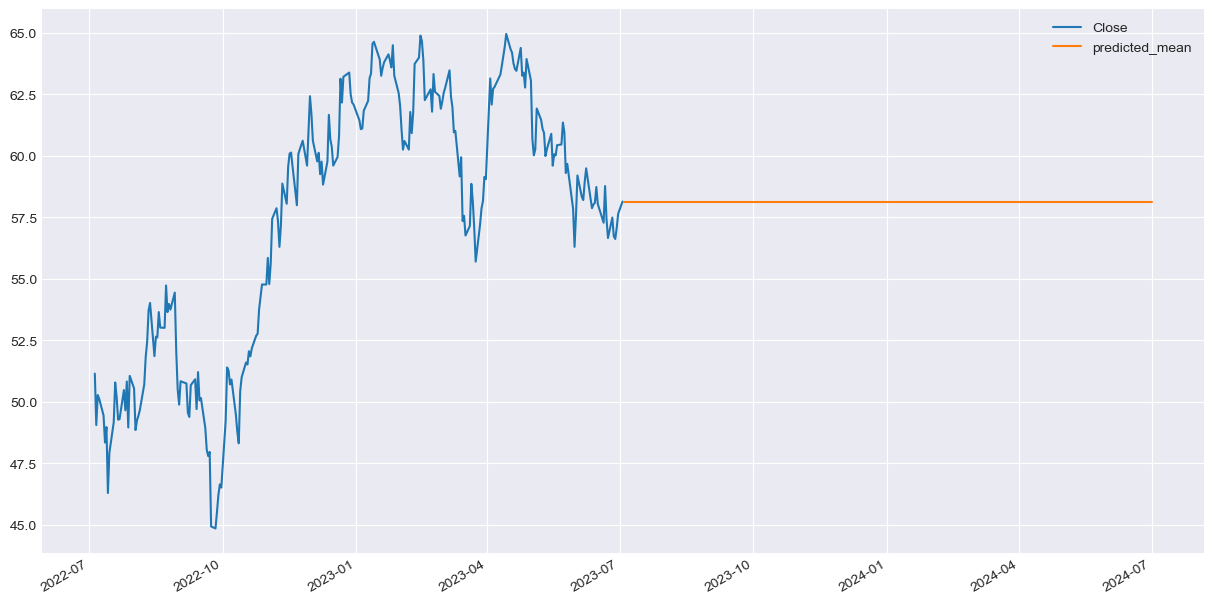

In [89]:
dfloc = df.loc[:, ['Close', 'diff_close']]
new_dates = [dfloc.index[-1] + DateOffset(months=x) for x in range(1, 365)]
forecast = result_pax.get_forecast(steps=len(new_dates))
forecast_conf = forecast.conf_int()
df_pred = pd.concat([dfloc, forecast.predicted_mean.to_frame(name='predicted_mean')])
df_pred.plot(y=['Close', 'predicted_mean'])

La evaluación del modelo nos da un MAE de 0.77 y un RMSE de 0.98.

### b)Prophet:

El modelo de Prophet advierte de un descenso linel en el valor de las acciones, llegando a los 40 euros en Julio de 2024. Su predicción más optimista la vimos anteriormente con un descenso en el precio para después recuperarse a principios de 2024.

In [90]:
px.line(pd.concat([dfprophet.set_index('ds')['y'], forecast_ml_df.set_index('ds')['yhat']], axis = 1), title = 'Proyecciones con Prophet - Estacionalidad aditiva')

La evaluación del modelo nos da un MAE de 5.9 y un RMSE de 4.9.




### c)Boosting:

El modelo de Boosting predice una estabilidad en el precio de las acciones durante los primeros dos meses para luego hacer un descenso brusco un septiembre de 2023, estabilizandose en torno a los 47 euros. 

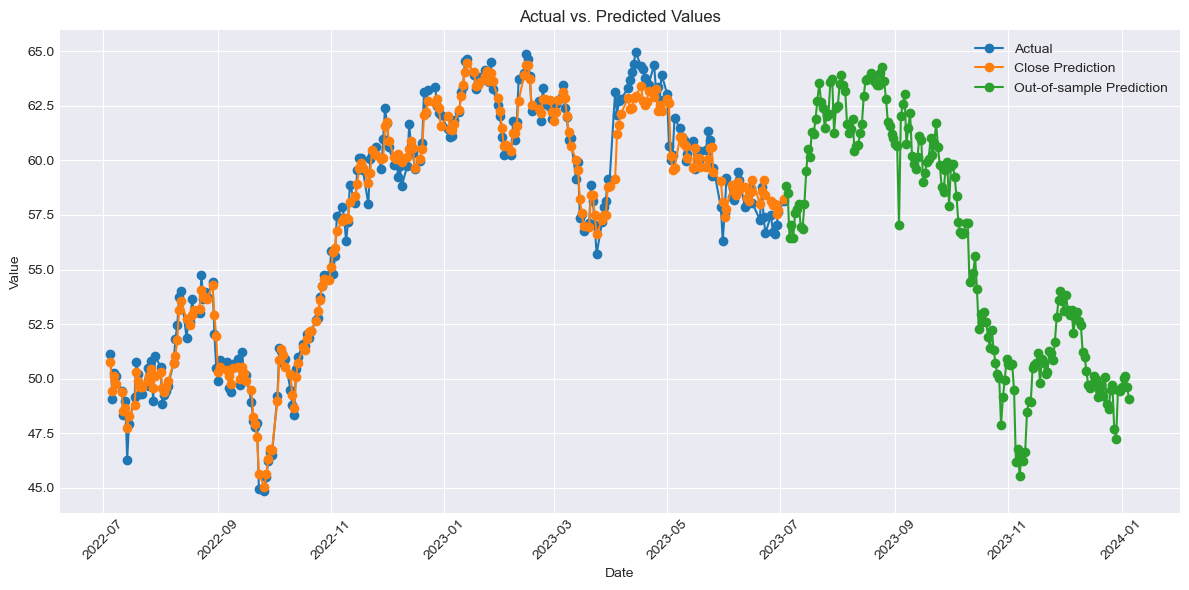

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['ds'], df_combined['y'], label='Actual', marker='o')
plt.plot(df_combined['ds'], df_combined['close_pred'], label='Close Prediction', marker='o')
plt.plot(df_combined['ds'], df_combined['out_of_sample_pred'], label='Out-of-sample Prediction', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La evaluación del modelo nos da un MAE de 0.8685 y un RMSE de 1.2526.

#### Selección del modelo:

Analizando los tres modelos a la vez podemos ver que ninguno realiza una predicción alcista de los precios. La predicción más optimista la muestra ARIMA en una estabilidad de los precios, o la visión más optimista de Prophet con un descenso inicial leve y una recuperación a inicios del siguiente año. Tanto la predicción general de Prophet como del modelo de Boosting muestran un descenso en el valor de las acciones para los meses siguiente a julio de 2023.

Un analisis en conjunto invita a pensar que el valor descenderá a lo largo del año y llegará a Julio de 2024 por debajo de los 58 euros de Julio de 2023, rondando los 40-45 euros.

Nos decantaríamos por el modelo de **Boosting** por varios motivos:

1. La evaluación del modelo muestra un error medio y un error cuadrático medio inferiores al modelo de Prophet y que se acercan mucho a ARIMA.

2. El modelo de Boosting contiene una función en el código que itera cada día de predicción contando con las predicciones de los días previos. Esto nos genera una predicción de precios más lógicas y nos muestra una morfología predictiva más real.
3. La predicción del modelo encaja más con la visión general de que los precios tendrían una linea descendente.